In [1]:
from prosody import prosody_log
# Import the function from the Python file
from jvb import read_log_file

# Define the path to the log file
log_file_path = 'jvb.log'

# Call the function to get the DataFrame
jvb_df = read_log_file(log_file_path)

from prosody import prosody_log
log_file_path = 'prosody.log'
# Call the function to get the DataFrame
prosody_df = prosody_log(log_file_path)

from jicofo import analyze_jicofo_log 
# Path to the jicofo.log file
jicofo_log_file = 'jicofo.log'
# Call the function to analyze the log file and get the DataFrame
jicofo_df = analyze_jicofo_log(jicofo_log_file)


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
jicofo_df.sample(5)

,service,timestamp,log_level,thread,message,Date,Time
9,Jicofo,2024-04-22 22:01:44.748,INFO,1,XmppServices.<init>#75: No Jigasi detector con...,2024-04-22,22:01:44.748000
38,Jicofo,2024-04-22 22:01:48.841,INFO,1,org.eclipse.jetty.server.AbstractConnector.doS...,2024-04-22,22:01:48.841000
15,Jicofo,2022-04-22 19:01:45.218,INFO,1,[type=bridge brewery=jvbbrewery] BaseBrewery.<...,2022-04-22,19:01:45.218000
45,Jicofo,2024-04-22 22:10:28.276,INFO,30,[xmpp_connection=client] XmppProvider.discover...,2024-04-22,22:10:28.276000
10,Jicofo,2022-04-22 22:01:44.753,INFO,1,AvModerationHandler.componentsChanged#112: No ...,2022-04-22,22:01:44.753000


# Bar Chart of Log level


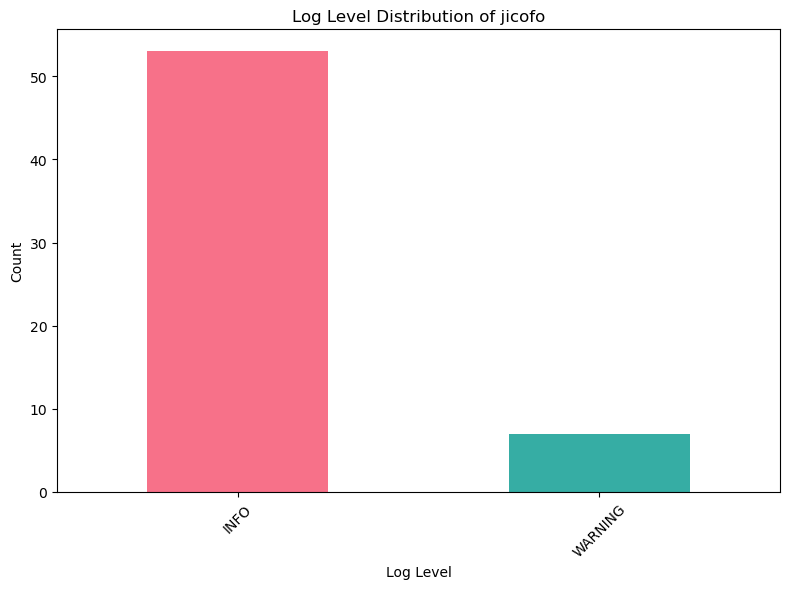

In [3]:
log_level_counts = jicofo_df['log_level'].value_counts()
colors = sns.color_palette("husl", len(log_level_counts))

# Plotting
plt.figure(figsize=(8, 6))
log_level_counts.plot(kind='bar', color=colors)
plt.title('Log Level Distribution of jicofo')
plt.xlabel('Log Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [4]:
jicofo_df['log_level'].value_counts()

log_level
INFO       53
WARNING     7
Name: count, dtype: int64

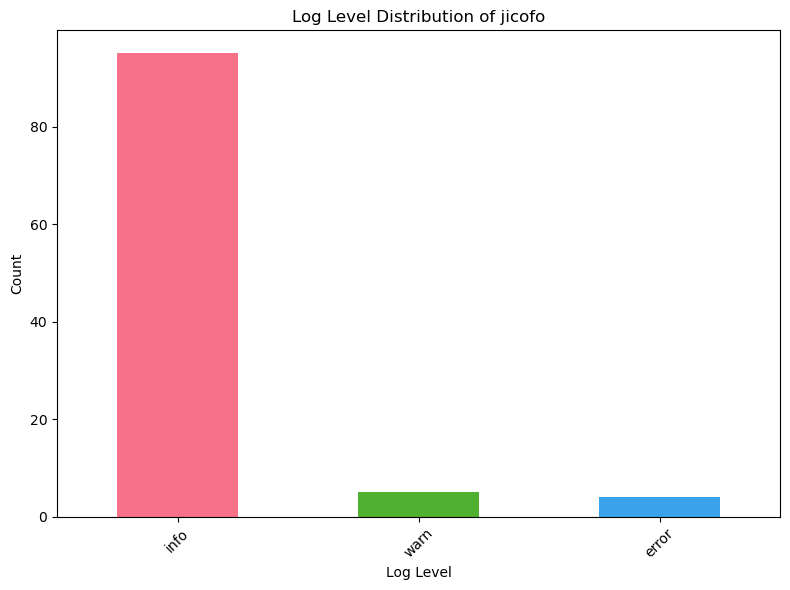

In [5]:
log_level_counts = prosody_df['log_level'].value_counts()
colors = sns.color_palette("husl", len(log_level_counts))

# Plotting
plt.figure(figsize=(8, 6))
log_level_counts.plot(kind='bar', color=colors)
plt.title('Log Level Distribution of jicofo')
plt.xlabel('Log Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

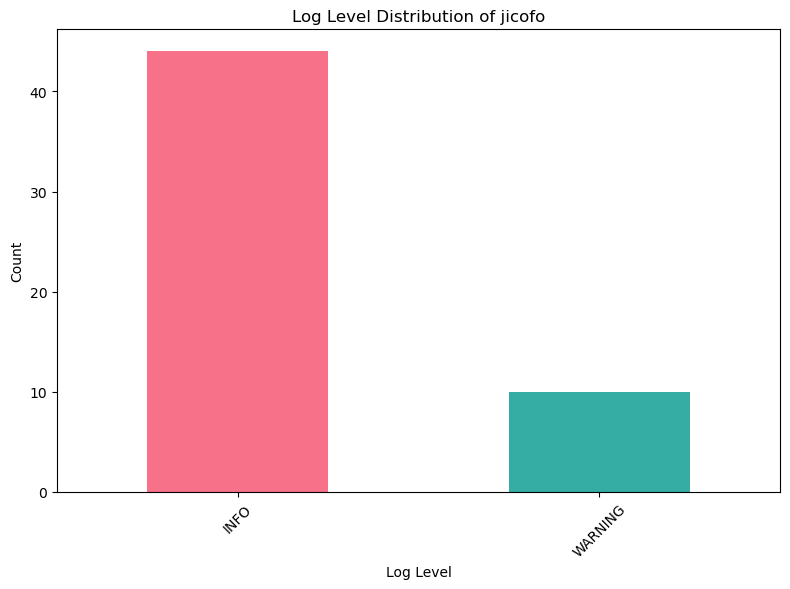

In [6]:
log_level_counts = jvb_df['log_level'].value_counts()
colors = sns.color_palette("husl", len(log_level_counts))

# Plotting
plt.figure(figsize=(8, 6))
log_level_counts.plot(kind='bar', color=colors)
plt.title('Log Level Distribution of jicofo')
plt.xlabel('Log Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
jvb_df['log_level'].value_counts()

log_level
INFO       44
WARNING    10
Name: count, dtype: int64

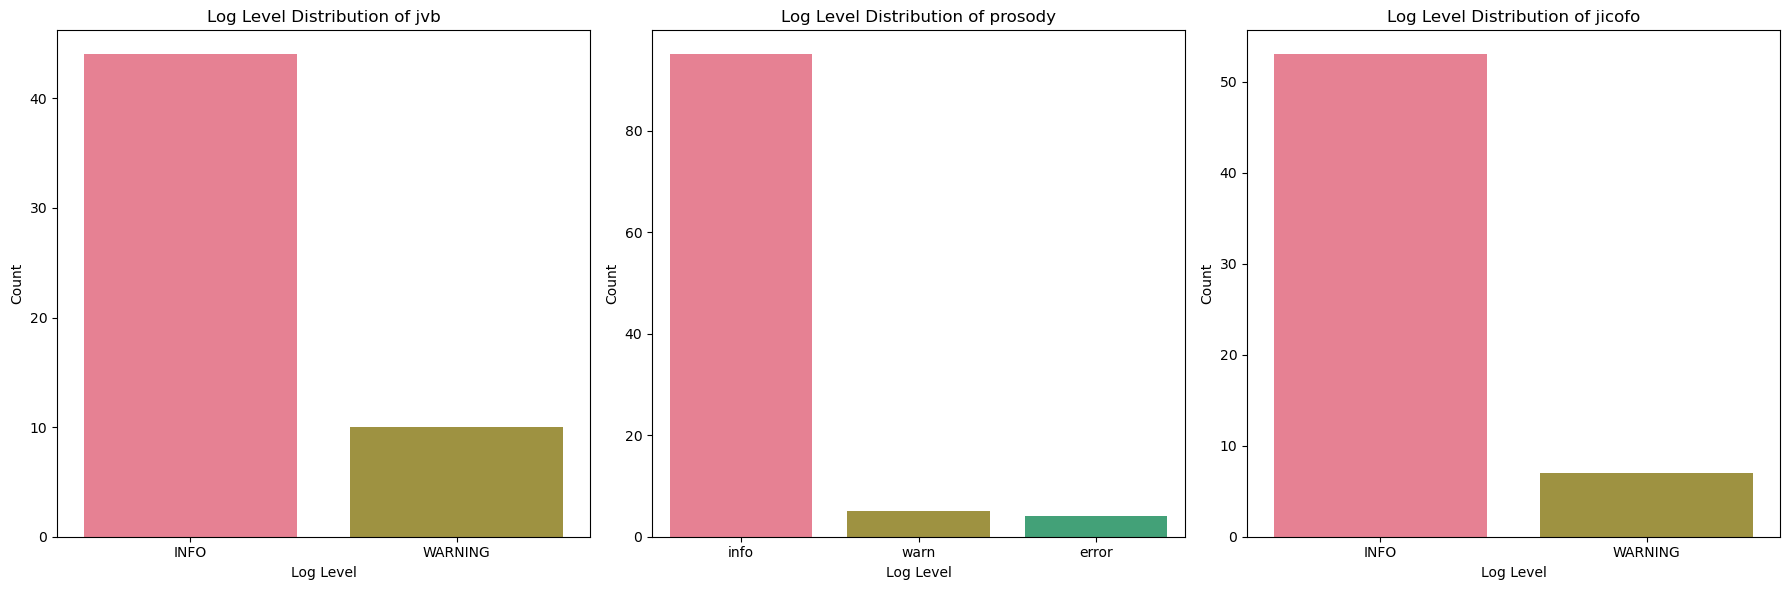

In [8]:

combined_df = pd.concat([jvb_df['log_level'], prosody_df['log_level'], jicofo_df['log_level']], ignore_index=True)


unique_log_levels = combined_df.unique()

custom_palette = sns.color_palette("husl", n_colors=len(unique_log_levels))

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.barplot(x=jvb_df['log_level'].value_counts().index, y=jvb_df['log_level'].value_counts().values, palette=custom_palette, ax=axes[0])
axes[0].set_title('Log Level Distribution of jvb')
axes[0].set_xlabel('Log Level')
axes[0].set_ylabel('Count')

sns.barplot(x=prosody_df['log_level'].value_counts().index, y=prosody_df['log_level'].value_counts().values, palette=custom_palette, ax=axes[1])
axes[1].set_title('Log Level Distribution of prosody')
axes[1].set_xlabel('Log Level')
axes[1].set_ylabel('Count')

sns.barplot(x=jicofo_df['log_level'].value_counts().index, y=jicofo_df['log_level'].value_counts().values, palette=custom_palette, ax=axes[2])
axes[2].set_title('Log Level Distribution of jicofo')
axes[2].set_xlabel('Log Level')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


# pie charts


In [22]:
import plotly.express as px

log_level_counts_jvb = jvb_df['log_level'].value_counts()
log_level_counts_prosody = prosody_df['log_level'].value_counts()
log_level_counts_jicofo = jicofo_df['log_level'].value_counts()

log_level_counts_df_jvb = pd.DataFrame({'Log Level': log_level_counts_jvb.index, 'Count': log_level_counts_jvb.values})
log_level_counts_df_prosody = pd.DataFrame({'Log Level': log_level_counts_prosody.index, 'Count': log_level_counts_prosody.values})
log_level_counts_df_jicofo = pd.DataFrame({'Log Level': log_level_counts_jicofo.index, 'Count': log_level_counts_jicofo.values})

fig = px.pie(log_level_counts_df_jvb, values='Count', names='Log Level', title='Log Level Distribution in jvb')
fig2 = px.pie(log_level_counts_df_prosody, values='Count', names='Log Level', title='Log Level Distribution in prosody')
fig3 = px.pie(log_level_counts_df_jicofo, values='Count', names='Log Level', title='Log Level Distribution in jicofo')

fig.update_layout(width=400, height=400)
fig2.update_layout(width=400, height=400)
fig3.update_layout(width=400, height=400)

fig.update_layout(
    grid=dict(rows=1, columns=3),
    margin=dict(l=10, r=10, t=60, b=10),
)

fig.show()
fig2.show()
fig3.show()


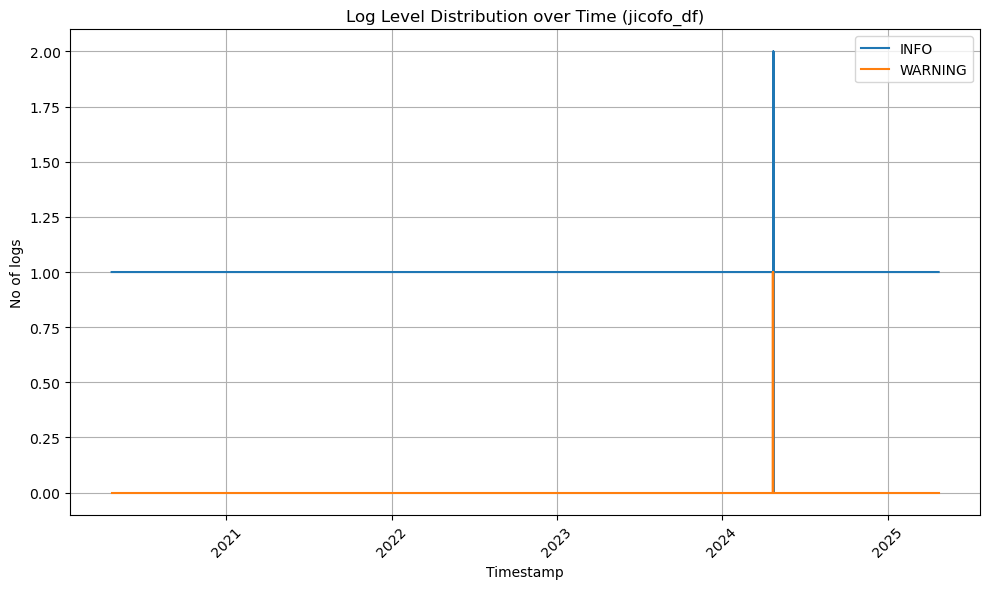

In [23]:
jicofo_df['timestamp'] = pd.to_datetime(jicofo_df['timestamp'])

log_level_counts = jicofo_df.groupby(['timestamp', 'log_level']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
for log_level in log_level_counts.columns:
    plt.plot(log_level_counts.index, log_level_counts[log_level], label=log_level)

# Customize the plot
plt.title('Log Level Distribution over Time (jicofo_df)')
plt.xlabel('Timestamp')
plt.ylabel('No of logs')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

